In [180]:
import lasio as ls
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [181]:
def calc_OBG_psig(df_file, DEN, DEPTH, g = 9.81):
    df_file.dropna(axis = 0)
    df_file["OBG"] = (DEN*1000 * g * 0.1524)*0.00014504 # [Psig] (converting g/cc to kg/m3)
    #toconvert from Pa to psig, we multiply by 0.00014504
    #the functino cumsum is used to create a cummulative production sum in python
    df_file["OBG_inc"]  = df_file["OBG"].cumsum() + 3600 #(3600 - column of water and foramtion above the start of the logging point)

def calc_normal_trend(df_file):
    #plot the sonic plot. 
    #calculating the pore pressure using the Eaton's equation (see pdf). Eatons equation is useful for shale formations. Fluid bearign shale may also behave differently.
    #first create a fitted line to get the slope and intercept of a line thorugh the sonic log
    polyfit = np.polyfit(df_file['DEPTH'], df_file['DT'], 1) #this gets the coefficient
    poly_func = np.poly1d(polyfit) #this creates a fitting function
    df_file['sonic fit'] = poly_func(df_file['DEPTH']) #This makes the prediction on the depth value using the fitted eqautions

    





In [182]:
filename = "volve.LAS"

data_las = ls.read(filename)

In [183]:
data_las.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="UNKNOWN", descr="Measured Depth", original_mnemonic="DEPTH", data.shape=(25899,)),
 CurveItem(mnemonic="CARB_FLAG", unit="UNKNOWN", value="UNKNOWN  : CARB_FLAG:UNKNOWN:rC:NONE", descr="v1", original_mnemonic="CARB_FLAG", data.shape=(25899,)),
 CurveItem(mnemonic="COAL_FLAG", unit="UNKNOWN", value="UNKNOWN  : COAL_FLAG:UNKNOWN:rC:NONE", descr="v1", original_mnemonic="COAL_FLAG", data.shape=(25899,)),
 CurveItem(mnemonic="DT", unit="us/ft", value="UNKNOWN  : DT:UNKNOWN:rC:NONE", descr="v2", original_mnemonic="DT", data.shape=(25899,)),
 CurveItem(mnemonic="GR", unit="API", value="UNKNOWN  : GR:UNKNOWN:rC:NONE", descr="v1", original_mnemonic="GR", data.shape=(25899,)),
 CurveItem(mnemonic="NPHI", unit="v/v_decimal", value="UNKNOWN  : NPHI:UNKNOWN:rC:NONE", descr="v1", original_mnemonic="NPHI", data.shape=(25899,)),
 CurveItem(mnemonic="RD", unit="UNKNOWN", value="UNKNOWN  : RD:UNKNOWN:rC:NONE", descr="v1", original_mnemonic="RD", data.shape=(2

In [184]:
to_plot = ["GR", "RHOB", "DT", "OBG_inc"]
colors = ['green','red', 'blue', 'purple']

In [185]:
#convert las or log file to a dataframe
df = data_las.df()
df.reset_index(inplace=True)

#Remove the -ve vlaues by creating a filter to take only useful numbers
df = df[ df['DT']>0]
df.head()

,DEPTH,CARB_FLAG,COAL_FLAG,DT,GR,NPHI,RD,RHOB,ROP5_RM,RS,RT,SAND_FLAG
7407,1368.7044,NaN,NaN,152.749801,120.349998,0.4487,0.9218,1.7212,9.975100,1.7319,1.1466,NaN
7408,1368.8568,NaN,NaN,151.107299,122.358100,0.4236,0.9640,1.7273,10.017200,2.3045,1.1124,NaN
7409,1369.0092,NaN,NaN,153.146392,119.607200,0.3936,0.9659,1.7256,10.011300,2.3507,1.0262,NaN
7410,1369.1616,NaN,NaN,151.787597,122.000503,0.4558,1.0131,1.7412,10.003899,2.4117,0.9215,NaN
7411,1369.3140,NaN,NaN,150.264892,121.560302,0.4363,1.0484,1.7538,10.001000,2.2784,0.8959,NaN


In [186]:
#load calibration file contaiining depth and pressures.
calib_df=pd.read_csv("calb.txt", sep='\t')
calib_df.head()

,MD,TVD,FP
0,2679.41,2576.64,221.930
1,2619.49,2524.65,216.360
2,2591.00,2498.87,213.720
3,2871.76,3127.71,320.020
4,2871.92,3127.99,320.042


In [187]:
calc_OBG_psig(df, df['RHOB'], df['DEPTH'])

In [188]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
df.head()

,DEPTH,CARB_FLAG,COAL_FLAG,DT,GR,NPHI,RD,RHOB,ROP5_RM,RS,RT,SAND_FLAG,OBG,OBG_inc
7407,1368.7044,NaN,NaN,152.749801,120.349998,0.4487,0.9218,1.7212,9.975100,1.7319,1.1466,NaN,0.373227,3600.373227
7408,1368.8568,NaN,NaN,151.107299,122.358100,0.4236,0.9640,1.7273,10.017200,2.3045,1.1124,NaN,0.374550,3600.747777
7409,1369.0092,NaN,NaN,153.146392,119.607200,0.3936,0.9659,1.7256,10.011300,2.3507,1.0262,NaN,0.374181,3601.121958
7410,1369.1616,NaN,NaN,151.787597,122.000503,0.4558,1.0131,1.7412,10.003899,2.4117,0.9215,NaN,0.377564,3601.499522
7411,1369.3140,NaN,NaN,150.264892,121.560302,0.4363,1.0484,1.7538,10.001000,2.2784,0.8959,NaN,0.380296,3601.879818


In [189]:
#do the caolculation on teh sonic log trend
calc_normal_trend(df)

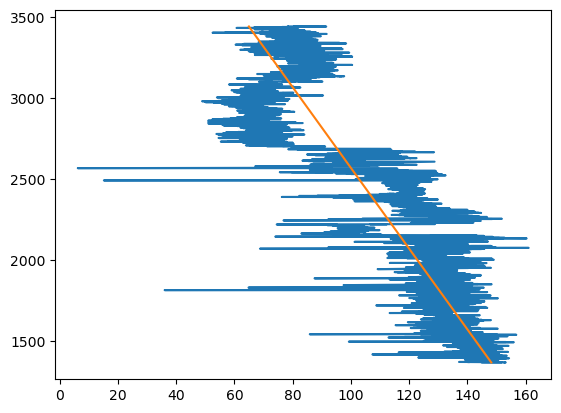

In [190]:
#plot the trend on the sonic curve
plt.plot(df['DT'], df['DEPTH'])
plt.plot(df['sonic fit'], df['DEPTH'])
plt.show()

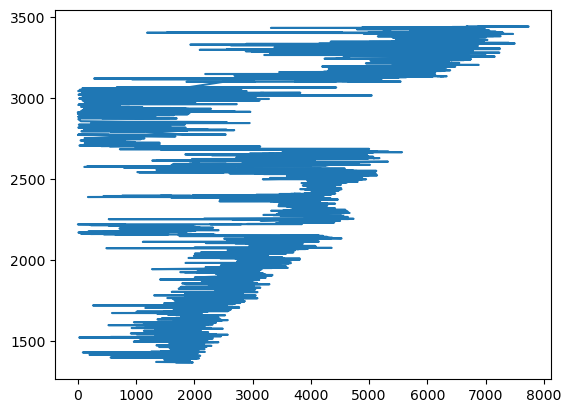

In [195]:

# mud_den = 0.052*8.33*(df["DEPTH"]*3.048)

mud_grad = 0.433
df['Pore_Press'] = df["OBG_inc"] - ((df['OBG_inc'] - mud_grad*df["DEPTH"]*3.048) * (df['sonic fit']/df['DT'])**3)
df['Pore_Press2'] = df["OBG_inc"] - ((df['OBG_inc'] - mud_grad*df["DEPTH"]*3.048) * (df['sonic fit']/df['DT'])**2.5)
df['Pore_Press3'] = df["OBG_inc"] - ((df['OBG_inc'] - mud_grad*df["DEPTH"]*3.048) * (df['sonic fit']/df['DT'])**2)
#create a filter to delete negative values from the data frame
df = df[df['Pore_Press'] >= 0]
df = df[df['Pore_Press2'] >= 0]
df = df[df['Pore_Press3'] >= 0]
plt.plot(df['Pore_Press'], df['DEPTH'])


In [196]:
df.columns

Index(['DEPTH', 'CARB_FLAG', 'COAL_FLAG', 'DT', 'GR', 'NPHI', 'RD', 'RHOB',
       'ROP5_RM', 'RS', 'RT', 'SAND_FLAG', 'OBG', 'OBG_inc', 'sonic fit',
       'Pore_Press', 'Pore_Press2', 'Pore_Press3'],
      dtype='object')

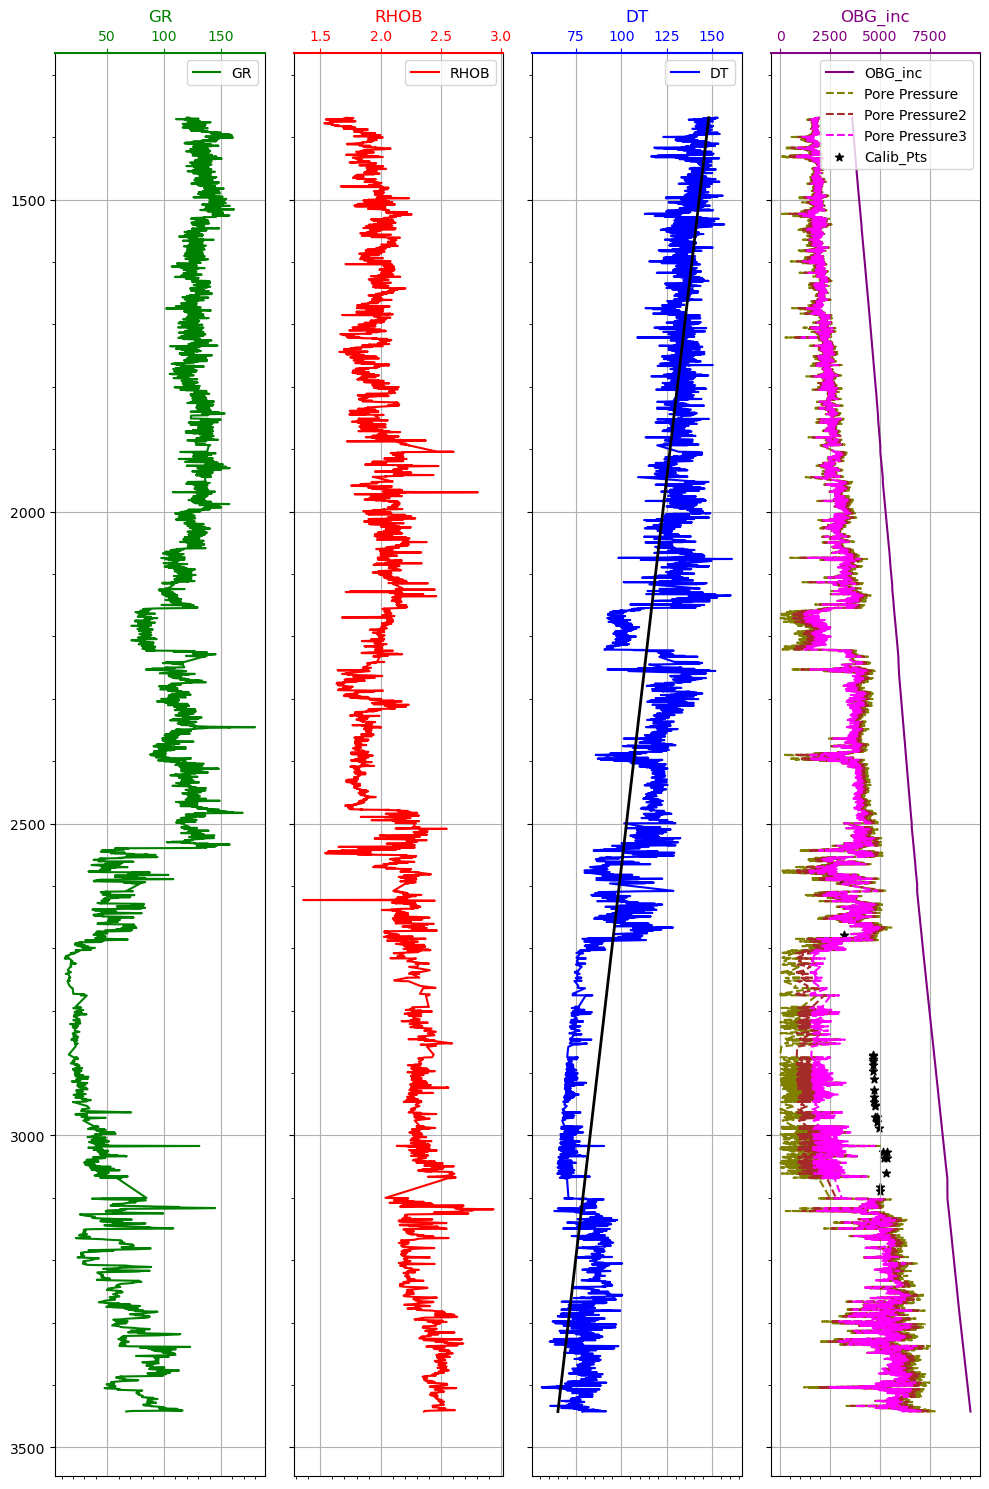

In [212]:

# def customize_x_axis(axis, user_color = 'black', labelText = " ", spine_pos = 1.0):
#     axis.grid()
#     axis.xaxis.set_label_position('top')
#     axis.set_xlabel(labelText, color = user_color)
#     axis.tick_params(axis = 'x', top = True, bottom = False,
#                           labeltop = True, labelbottom = False, color  = user_color, labelcolor = user_color)
#     axis.spines.top.set_color(user_color)
#     axis.spines.top.set_linewidth(1.5)
#     axis.spines.top.set_position(('axes', spine_pos))



#lets put the plots together

fig, ax = plt.subplots(1,4,sharey = True, figsize = (10,15))
for i in range(0,len(to_plot)):
    var = to_plot[i]
    color = colors[i]
    ax[i].plot(df[var], df["DEPTH"], label = var, color=color)
    ax[i].legend(); ax[i].grid()
    ax[i].xaxis.set_label_position('top')
    ax[i].tick_params(axis = 'x', top = True, bottom = False,labeltop = True, labelbottom = False, color  = color, labelcolor = color)
    ax[i].set_title(var, color = color)
    ax[i].spines.top.set_color(color)
    ax[i].spines.top.set_linewidth(1.5)
    ax[i].minorticks_on()

ax[2].plot(df['sonic fit'], df['DEPTH'], color = 'black', lw = 2.0)
ax[3].plot(df['Pore_Press'], df['DEPTH'], ls="dashed", lw=1.5, color='olive', label= "Pore Pressure")
ax[3].plot(df['Pore_Press2'], df['DEPTH'], ls="dashed", lw=1.5, color='brown', label= "Pore Pressure2")
ax[3].plot(df['Pore_Press3'], df['DEPTH'], ls="dashed", lw=1.5, color='magenta', label= "Pore Pressure3")
ax[3].scatter(calib_df['FP']*14.5, calib_df['MD'], color='black', marker = '*',label= "Calib_Pts")
ax[3].legend(loc= 'upper right')
ax[0].invert_yaxis()
fig.tight_layout()
fig.savefig("logplots.pdf")


#Exporting the Data
df_excel = df.to_excel("Pore Pressure Data.xlsx")



# to_plot = ["GR", "RHOB", "DT", "OBG_inc"]
# colors = ['green','red', 'blue', 'purple']